In [1]:
#We decided to make graphs based on dataset provided by kaggle.com. I chose world universeties ranking in four different years 
#2012-2015

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import Divider, Size

df = pd.read_csv ('dataset.csv')

In [2]:
print(df)

     world_rank                            institution         country  \
0             1                     Harvard University             USA   
1             2  Massachusetts Institute of Technology             USA   
2             3                    Stanford University             USA   
3             4                University of Cambridge  United Kingdom   
4             5     California Institute of Technology             USA   
..          ...                                    ...             ...   
395          96                   University of Zurich     Switzerland   
396          97               Arizona State University             USA   
397          98                      Yonsei University     South Korea   
398          99                     University of Oslo          Norway   
399         100                      Kyushu University           Japan   

     national_rank  quality_of_education  alumni_employment  \
0                1                     7        

In [3]:
dk=df[['world_rank','institution','national_rank','year']]
dk.head()

,world_rank,institution,national_rank,year
0,1,Harvard University,1,2012
1,2,Massachusetts Institute of Technology,2,2012
2,3,Stanford University,3,2012
3,4,University of Cambridge,1,2012
4,5,California Institute of Technology,4,2012


In [4]:
dk.tail()

,world_rank,institution,national_rank,year
395,96,University of Zurich,4,2015
396,97,Arizona State University,55,2015
397,98,Yonsei University,2,2015
398,99,University of Oslo,1,2015
399,100,Kyushu University,7,2015


In [5]:
wr_sort = dk.sort_values('world_rank')
wr_sort = wr_sort.loc[0:309,['world_rank','institution', 'year','national_rank']]
wr_sort

,world_rank,institution,year,national_rank
0,1,Harvard University,2012,1
200,1,Harvard University,2014,1
300,1,Harvard University,2015,1
100,1,Harvard University,2013,1
1,2,Massachusetts Institute of Technology,2012,2
201,2,Stanford University,2014,2
101,2,Stanford University,2013,2
301,2,Stanford University,2015,2
302,3,Massachusetts Institute of Technology,2015,3
202,3,Massachusetts Institute of Technology,2014,3


In [6]:
top10=wr_sort.groupby(['year', 'world_rank', 'institution']).sum()
top10

national_rank
year world_rank institution                                         
2012 1          Harvard University                                 1
     2          Massachusetts Institute of Technology              2
     3          Stanford University                                3
     4          University of Cambridge                            1
     5          California Institute of Technology                 4
     6          Princeton University                               5
     7          University of Oxford                               2
     8          Yale University                                    6
     9          Columbia University                                7
     10         University of California, Berkeley                 8
2013 1          Harvard University                                 1
     2          Stanford University                                2
     3          University of Oxford                               1
     4          Massachusetts Institute of Technology              3
     5          University of Cambridge                            2
     6          Columbia University                                4
     7          University of California, Berkeley                 5
     8          Princeton University                               6
     9          University of Chicago                              7
     10         Yale University                                    8
2014 1          Harvard University                                 1
     2          Stanford University                                2
     3          Massachusetts Institute of Technology              3
     4          University of Cambridge                            1
     5          University of Oxford                               2
     6          Columbia University                                4
     7          University of California, Berkeley                 5
     8          University of Chicago                              6
     9          Princeton University                               7
     10         Yale University                                    8
2015 1          Harvard University                                 1
     2          Stanford University                                2
     3          Massachusetts Institute of Technology              3
     4          University of Cambridge                            1
     5          University of Oxford                               2
     6          Columbia University                                4
     7          University of California, Berkeley                 5
     8          University of Chicago                              6
     9          Princeton University                               7
     10         Cornell University                                 8

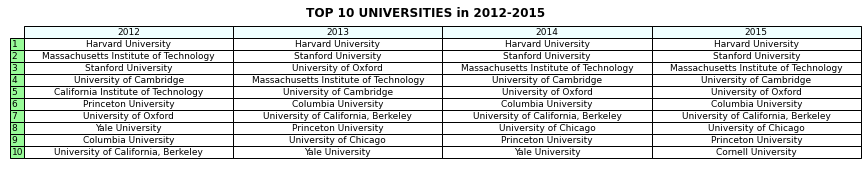

In [7]:
val1 = ['2012','2013','2014','2015'] 
val2 = ['1','2','3','4','5','6','7','8','9','10'] 
val3 = [['Harvard University','Harvard University','Harvard University','Harvard University'],
        ['Massachusetts Institute of Technology','Stanford University','Stanford University','Stanford University'],
       ['Stanford University','University of Oxford','Massachusetts Institute of Technology','Massachusetts Institute of Technology'],
        ['University of Cambridge','Massachusetts Institute of Technology','University of Cambridge','University of Cambridge'],
        ['California Institute of Technology', 'University of Cambridge','University of Oxford','University of Oxford'],
        ['Princeton University','Columbia University','Columbia University','Columbia University'],
        ['University of Oxford','University of California, Berkeley','University of California, Berkeley','University of California, Berkeley'],
        ['Yale University','Princeton University','University of Chicago','University of Chicago'],
        ['Columbia University','University of Chicago','Princeton University','Princeton University'],
        ['University of California, Berkeley','Yale University','Yale University','Cornell University']]

fig, ax = plt.subplots() 
ax.set_axis_off() 
fig.set_size_inches(15, 3) 
table = ax.table( 
    cellText = val3, 
    rowLabels = val2,  
    colLabels = val1, 
    rowColours =["palegreen"] * 10,  
    colColours =["azure"] * 10, 
    cellLoc ='center',  
    loc ='upper left')           
ax.set_title('TOP 10 UNIVERSITIES in 2012-2015', 
             fontweight ="bold") 
   
plt.show() 

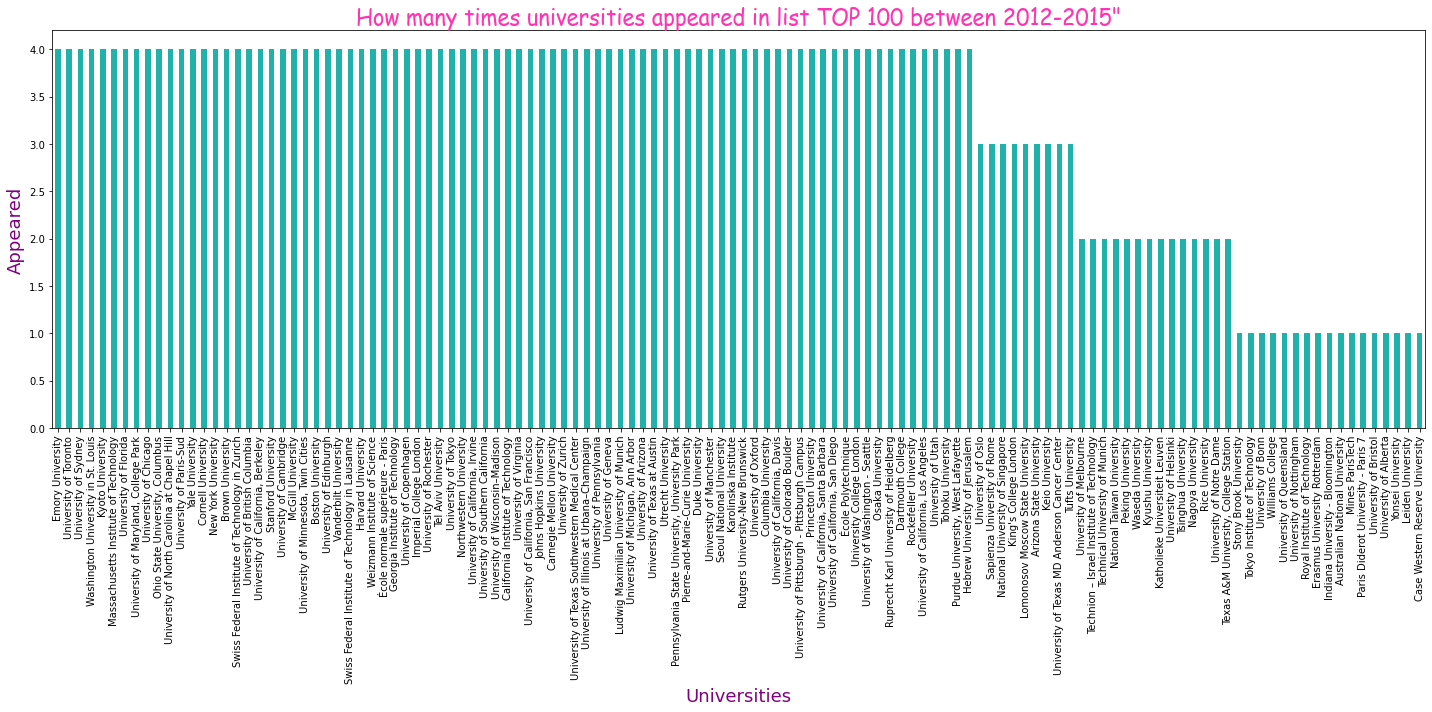

In [8]:
inst_count=dk['institution'].value_counts()
inst_count

bar_inst = inst_count.plot(kind='bar',color = 'lightseagreen', figsize=(20, 10))
font1 = {'family':'sans-serif','color':'purple','size':18}
font2 = {'family':'fantasy','color':'#FF34B3','size':22}
bar_inst.set_xlabel("Universities", fontdict = font1)
bar_inst.set_ylabel("Appeared", fontdict = font1)
plt.title('How many times universities appeared in list TOP 100 between 2012-2015"', fontdict = font2, loc = 'center')
plt.tight_layout()

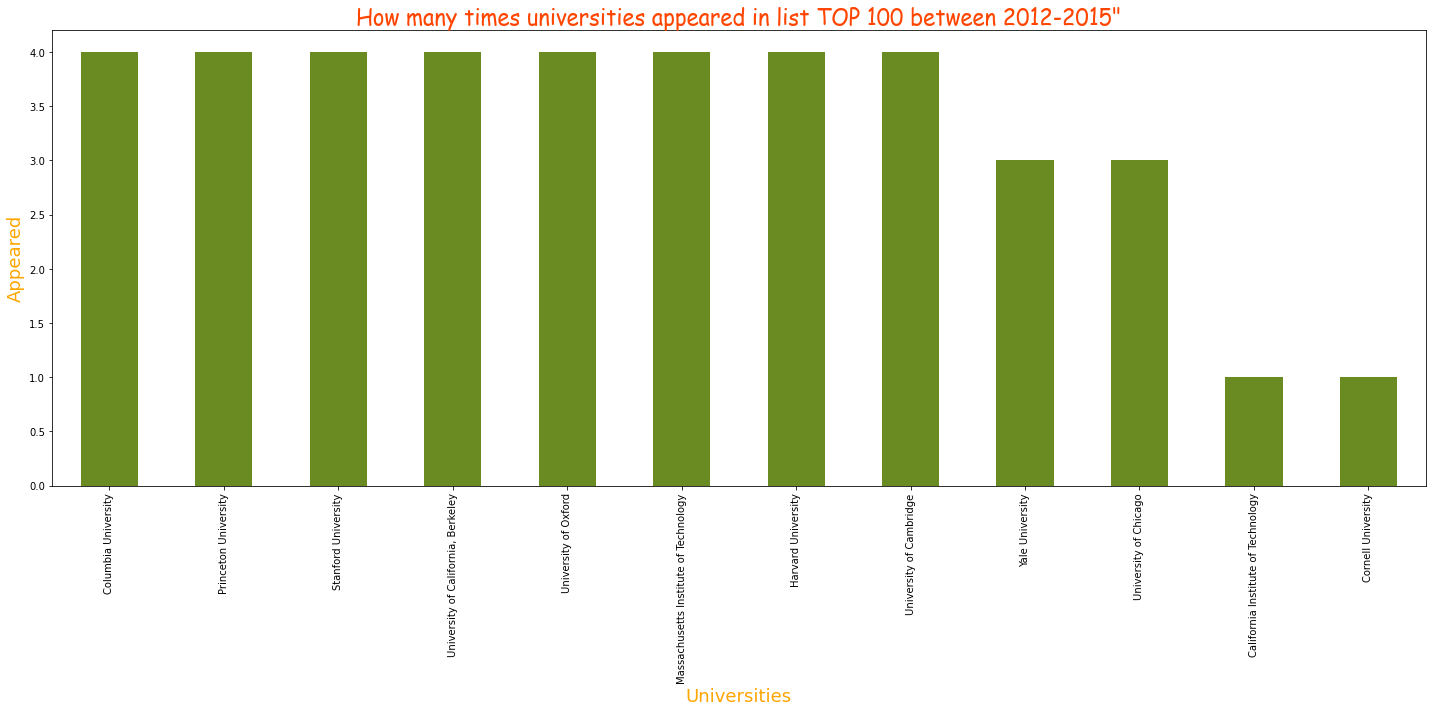

In [9]:
inst_count1=wr_sort['institution'].value_counts()
inst_count1

bar_inst1 = inst_count1.plot(kind='bar',color = '#698B22', figsize=(20, 10))
font1 = {'family':'sans-serif','color':'#FFA500','size':18}
font2 = {'family':'fantasy','color':'#FF4500','size':22}
bar_inst1.set_xlabel("Universities", fontdict = font1)
bar_inst1.set_ylabel("Appeared", fontdict = font1)
plt.title('How many times universities appeared in list TOP 100 between 2012-2015"', fontdict = font2, loc = 'center')
plt.tight_layout()

In [10]:
country=df[['country','year']]
country

,country,year
0,USA,2012
1,USA,2012
2,USA,2012
3,United Kingdom,2012
4,USA,2012
...,...,...
395,Switzerland,2015
396,USA,2015
397,South Korea,2015
398,Norway,2015


In [11]:
count = country.value_counts()
count

country  year
USA      2012    58
         2013    57
         2015    55
         2014    53
Japan    2014     8
                 ..
Russia   2014     1
         2013     1
Norway   2015     1
         2013     1
         2012     1
Length: 72, dtype: int64

In [12]:
count.to_csv ('country_count.csv')
country_count = pd.read_csv('country_count.csv')
country_count

,country,year,0
0,USA,2012,58
1,USA,2013,57
2,USA,2015,55
3,USA,2014,53
4,Japan,2014,8
...,...,...,...
67,Russia,2014,1
68,Russia,2013,1
69,Norway,2015,1
70,Norway,2013,1


In [13]:
new_tbl = pd.pivot_table(country_count, values='0', index='country', columns='year', aggfunc=np.mean)
new_tbl

year,2012,2013,2014,2015
country,,,,
Australia,2.0,2.0,2.0,2.0
Belgium,NaN,NaN,1.0,1.0
Canada,3.0,4.0,3.0,3.0
China,NaN,NaN,2.0,2.0
Denmark,1.0,1.0,1.0,1.0
Finland,1.0,1.0,NaN,NaN
France,5.0,5.0,4.0,4.0
Germany,3.0,2.0,4.0,2.0
Israel,4.0,4.0,3.0,3.0


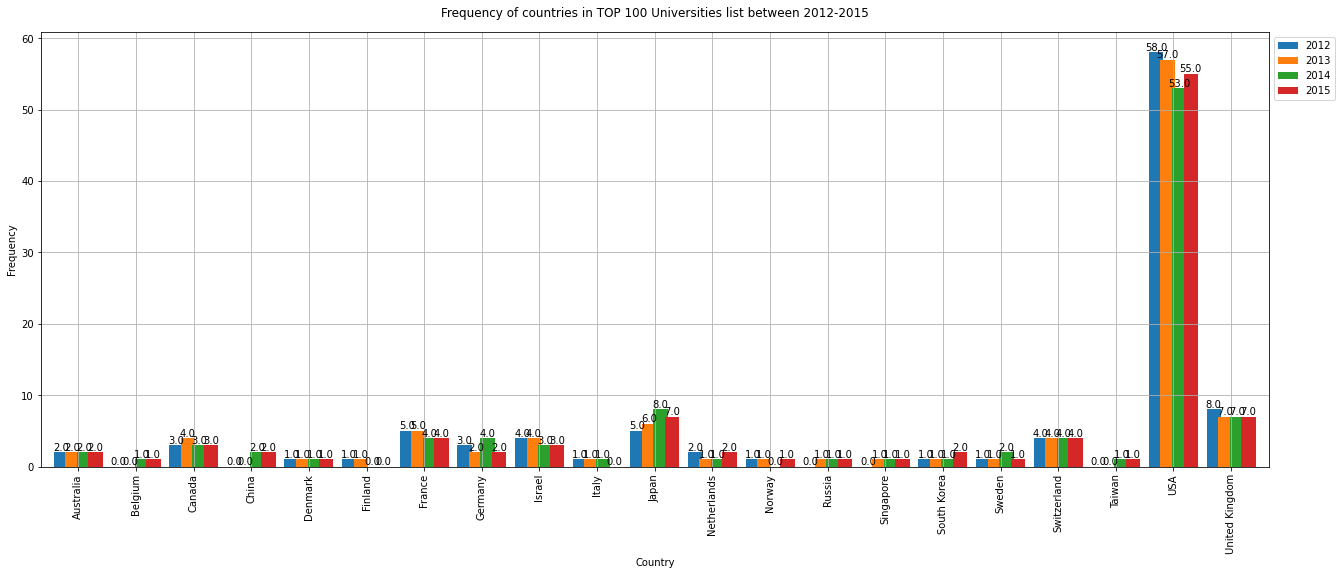

In [14]:
ax = new_tbl.plot(kind="bar", width = 0.8)
fig = ax.get_figure()
fig.set_size_inches(22, 8)
ax.set_xlabel("Country")
ax.set_ylabel("Frequency")
ax.set_title('Frequency of countries in TOP 100 Universities list between 2012-2015', pad=15)
ax.legend( bbox_to_anchor=(1,1), loc="upper left",ncol=1)
for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black',size=10)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .25)
ax.grid(True)
plt.show()

In [15]:
inst = wr_sort.value_counts('institution')
inst.iloc[0:10]
inst

institution
Columbia University                      4
Harvard University                       4
Massachusetts Institute of Technology    4
Princeton University                     4
Stanford University                      4
University of California, Berkeley       4
University of Cambridge                  4
University of Oxford                     4
University of Chicago                    3
Yale University                          3
California Institute of Technology       1
Cornell University                       1
dtype: int64

In [16]:
Columbia =df.loc[df['institution'] == 'Columbia University']
Harvard =df.loc[df['institution'] == 'Harvard University']
Massachusetts=df.loc[df['institution'] == 'Massachusetts Institute of Technology']
Princeton=df.loc[df['institution'] == 'Princeton University']
Stanford=df.loc[df['institution'] == 'Stanford University']
Berkeley=df.loc[df['institution'] == 'University of California, Berkeley']
Cambridge=df.loc[df['institution'] == 'University of Cambridge']
Oxford=df.loc[df['institution'] == 'University of Oxford']
Harvard

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.0,2012
100,1,Harvard University,USA,1,1,1,1,1,1,1,NaN,7,100.0,2013
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.0,2014
300,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.0,2015


In [17]:
cl_scr=Columbia.groupby(by=['institution','year']).score.mean().reset_index()
hv_scr=Harvard.groupby(by=['institution','year']).score.mean().reset_index()
ms_scr=Massachusetts.groupby(by=['institution','year']).score.mean().reset_index()
pr_scr=Princeton.groupby(by=['institution','year']).score.mean().reset_index()
st_scr=Stanford.groupby(by=['institution','year']).score.mean().reset_index()
br_scr=Berkeley.groupby(by=['institution','year']).score.mean().reset_index()
cm_scr=Cambridge.groupby(by=['institution','year']).score.mean().reset_index()
ox_scr=Oxford.groupby(by=['institution','year']).score.mean().reset_index()
cl_scr

,institution,year,score
0,Columbia University,2012,78.86
1,Columbia University,2013,88.21
2,Columbia University,2014,97.41
3,Columbia University,2015,96.14


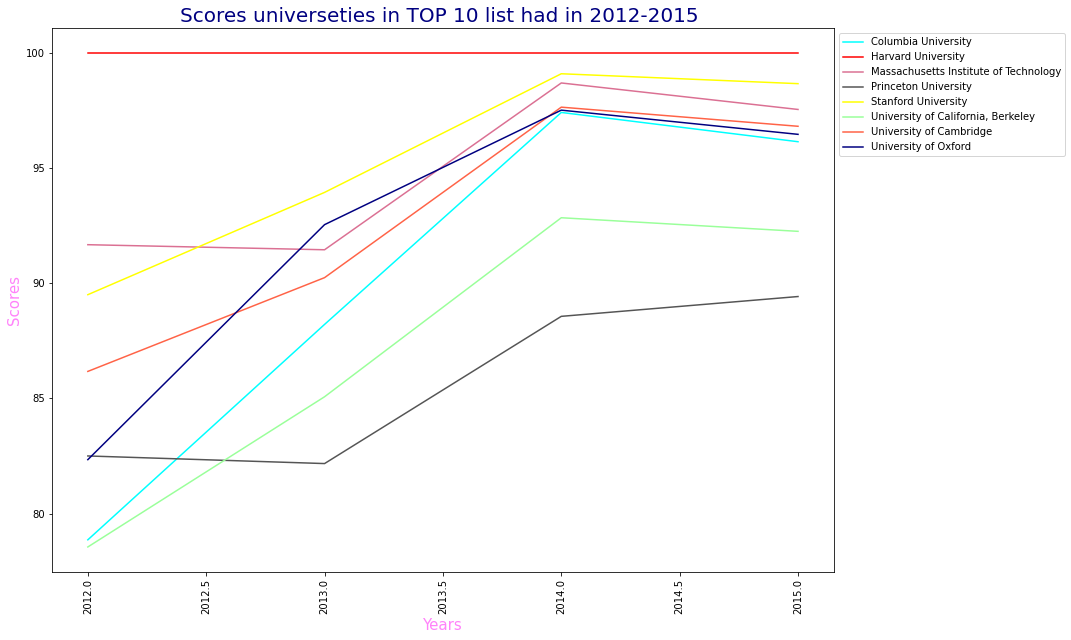

In [18]:
x1= cl_scr.year
x2= hv_scr.year
x3= ms_scr.year
x4= pr_scr.year
x5= st_scr.year
x6=br_scr.year
x7=cm_scr.year
x8=ox_scr.year
 
y1=cl_scr.score
y2= hv_scr.score
y3= ms_scr.score
y4= pr_scr.score
y5= st_scr.score
y6=br_scr.score
y7=cm_scr.score
y8=ox_scr.score

font1 = {'family':'sans-serif','color':'#000080','size':20}
font2 = {'family':'sans-serif','color':'#FF83FA','size':15}

f = plt.figure()
f.set_figwidth(14)
f.set_figheight(10)

plt.plot(x1, y1, color='cyan')
plt.plot(x2, y2, color='red')
plt.plot(x3, y3, color='#DB7093')
plt.plot(x4, y4, color='#555555')
plt.plot(x5, y5, color='yellow')
plt.plot(x6, y6, color='#9AFF9A')
plt.plot(x7, y7, color='#FF6347')
plt.plot(x8, y8, color='#000080')

plt.title('Scores universeties in TOP 10 list had in 2012-2015 ', fontdict = font1, loc = 'center')
plt.legend(['Columbia University', 'Harvard University', 'Massachusetts Institute of Technology', 'Princeton University', 
            'Stanford University','University of California, Berkeley', 'University of Cambridge', 'University of Oxford'], 
           bbox_to_anchor=(1,1), loc="upper left")
plt.ylabel('Scores', fontdict = font2, loc = 'center')
plt.xlabel('Years', fontdict = font2, loc = 'center')
plt.xticks(rotation=90)
plt.show()

In [19]:
hv_scr=Harvard.groupby(by=['institution','year']).quality_of_faculty.mean().reset_index()
ms_scr=Massachusetts.groupby(by=['institution','year']).quality_of_faculty.mean().reset_index()
st_scr=Stanford.groupby(by=['institution','year']).quality_of_faculty.mean().reset_index()
print(hv_scr)
print(st_scr)
print(ms_scr)

          institution  year  quality_of_faculty
0  Harvard University  2012                   1
1  Harvard University  2013                   1
2  Harvard University  2014                   1
3  Harvard University  2015                   1
           institution  year  quality_of_faculty
0  Stanford University  2012                   5
1  Stanford University  2013                   4
2  Stanford University  2014                   4
3  Stanford University  2015                   4
                             institution  year  quality_of_faculty
0  Massachusetts Institute of Technology  2012                   3
1  Massachusetts Institute of Technology  2013                   2
2  Massachusetts Institute of Technology  2014                   2
3  Massachusetts Institute of Technology  2015                   2


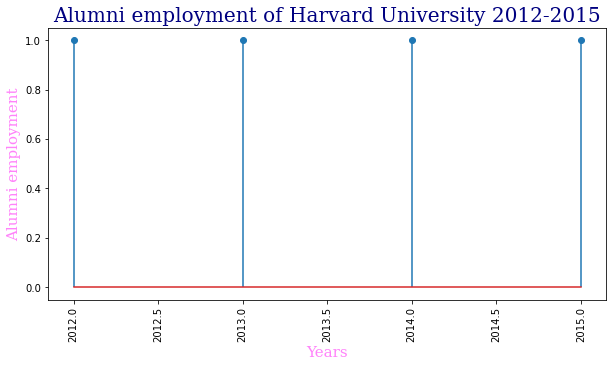

In [20]:
x1= hv_scr.year
y1=hv_scr.quality_of_faculty

font1 = {'family':'serif','color':'#000080','size':20}
font2 = {'family':'serif','color':'#FF83FA','size':15}

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.title('Alumni employment of Harvard University 2012-2015', fontdict = font1, loc = 'center')
plt.ylabel('Alumni employment', fontdict = font2, loc = 'center')
plt.xlabel('Years', fontdict = font2, loc = 'center')
plt.xticks(rotation=90)

plt.stem(x1,y1)
plt.show()

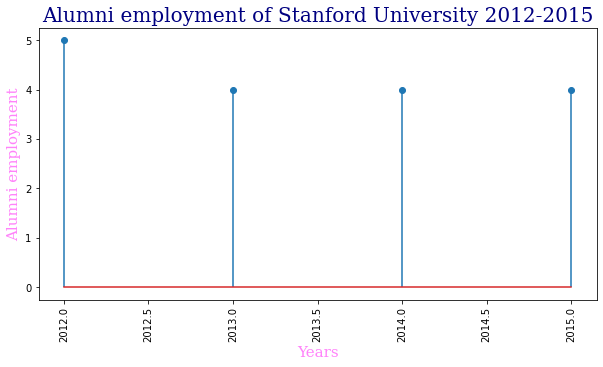

In [21]:
x2= st_scr.year
y2= st_scr.quality_of_faculty

font1 = {'family':'serif','color':'#000080','size':20}
font2 = {'family':'serif','color':'#FF83FA','size':15}

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.title('Alumni employment of Stanford University 2012-2015', fontdict = font1, loc = 'center')
plt.ylabel('Alumni employment', fontdict = font2, loc = 'center')
plt.xlabel('Years', fontdict = font2, loc = 'center')
plt.xticks(rotation=90)

plt.stem(x2,y2)
plt.show()

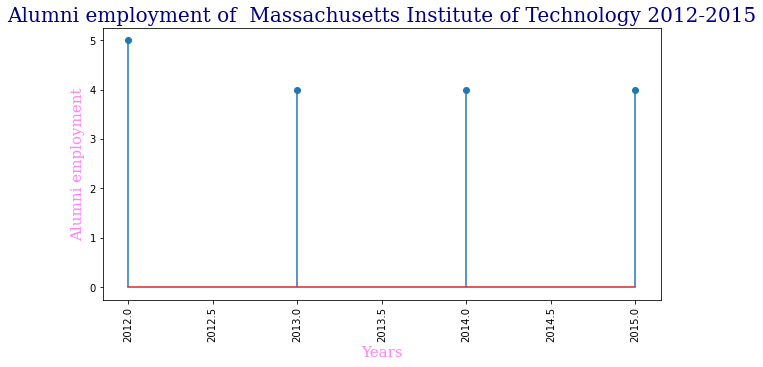

In [22]:
x3= st_scr.year
y3= st_scr.quality_of_faculty

font1 = {'family':'serif','color':'#000080','size':20}
font2 = {'family':'serif','color':'#FF83FA','size':15}

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.title('Alumni employment of  Massachusetts Institute of Technology 2012-2015', fontdict = font1, loc = 'center')
plt.ylabel('Alumni employment', fontdict = font2, loc = 'center')
plt.xlabel('Years', fontdict = font2, loc = 'center')
plt.xticks(rotation=90)

plt.stem(x3,y3)
plt.show()

In [23]:
nr_sort = wr_sort.groupby(['institution','year','national_rank', 'world_rank']).sum()
nr_sort

Empty DataFrame
Columns: []
Index: [(California Institute of Technology, 2012, 4, 5), (Columbia University, 2012, 7, 9), (Columbia University, 2013, 4, 6), (Columbia University, 2014, 4, 6), (Columbia University, 2015, 4, 6), (Cornell University, 2015, 8, 10), (Harvard University, 2012, 1, 1), (Harvard University, 2013, 1, 1), (Harvard University, 2014, 1, 1), (Harvard University, 2015, 1, 1), (Massachusetts Institute of Technology, 2012, 2, 2), (Massachusetts Institute of Technology, 2013, 3, 4), (Massachusetts Institute of Technology, 2014, 3, 3), (Massachusetts Institute of Technology, 2015, 3, 3), (Princeton University, 2012, 5, 6), (Princeton University, 2013, 6, 8), (Princeton University, 2014, 7, 9), (Princeton University, 2015, 7, 9), (Stanford University, 2012, 3, 3), (Stanford University, 2013, 2, 2), (Stanford University, 2014, 2, 2), (Stanford University, 2015, 2, 2), (University of California, Berkeley, 2012, 8, 10), (University of California, Berkeley, 2013, 5, 7), (University of California, Berkeley, 2014, 5, 7), (University of California, Berkeley, 2015, 5, 7), (University of Cambridge, 2012, 1, 4), (University of Cambridge, 2013, 2, 5), (University of Cambridge, 2014, 1, 4), (University of Cambridge, 2015, 1, 4), (University of Chicago, 2013, 7, 9), (University of Chicago, 2014, 6, 8), (University of Chicago, 2015, 6, 8), (University of Oxford, 2012, 2, 7), (University of Oxford, 2013, 1, 3), (University of Oxford, 2014, 2, 5), (University of Oxford, 2015, 2, 5), (Yale University, 2012, 6, 8), (Yale University, 2013, 8, 10), (Yale University, 2014, 8, 10)]

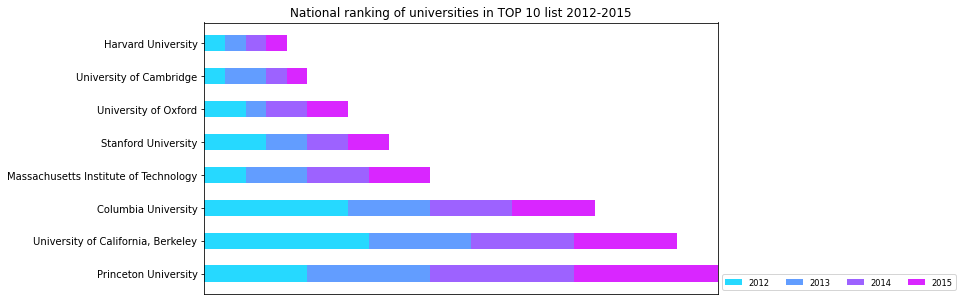

In [24]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['2012','2013','2014','2015']
results = {
    'Harvard University':[1,1,1,1],
    'University of Cambridge':[1,2,1,1],
    'University of Oxford':[2,1,2,2],
    'Stanford University':[3,2,2,2],
    'Massachusetts Institute of Technology':[2,3,3,3],
    'Columbia University':[7,4,4,4],
    'University of California, Berkeley':[8,5,5,5],
    'Princeton University':[5,6,7,7]
}

def survey (results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('cool')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        #ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(1, 0),
              loc='lower left', fontsize='small')
    plt.title('National ranking of universities in TOP 10 list 2012-2015')

    return fig, ax


survey(results, category_names)
plt.show()

In [25]:
dataFr = pd.read_csv(r'C:\Users\Munira\Downloads\universities V1.1.csv')
print ('Top Universities 2020-2021')
dataFr

Top Universities 2020-2021


,rank,name,location,national_rank,quality_of_education,alumni_employment,quality_of_faculty,research_performance,score,domain
0,1,Harvard University,USA,1,3,1,1,1,100.0,harvard.edu
1,2,Massachusetts Institute of Technology,USA,2,4,11,2,7,96.7,mit.edu
2,3,Stanford University,USA,3,10,4,3,2,95.2,stanford.edu
3,4,University of Cambridge,United Kingdom,1,1,21,4,11,94.1,cam.ac.uk
4,5,University of Oxford,United Kingdom,2,7,26,9,4,93.3,ox.ac.uk
...,...,...,...,...,...,...,...,...,...,...
1995,1996,Polytechnic Institute of Bragança,Portugal,15,-,-,-,1917,65.8,ipb.pt
1996,1997,Federal University of Maranhão,Brazil,57,-,-,-,1918,65.8,ufma.br
1997,1998,Autonomous University of Baja California,Mexico,20,-,-,-,1921,65.8,uabc.mx
1998,1999,American University in Cairo,Egypt,18,-,299,-,-,65.8,aucegypt.edu


In [26]:
worldRank = dataFr.loc[0:99,['rank','name', 'location']]
worldRank

,rank,name,location
0,1,Harvard University,USA
1,2,Massachusetts Institute of Technology,USA
2,3,Stanford University,USA
3,4,University of Cambridge,United Kingdom
4,5,University of Oxford,United Kingdom
...,...,...,...
95,96,University of Geneva,Switzerland
96,97,"University of California, Santa Barbara",USA
97,98,University of Sydney,Australia
98,99,University of Texas MD Anderson Cancer Center,USA


In [27]:
worldRank=worldRank.value_counts('location')
worldRank

location
USA               51
United Kingdom    10
France             5
Germany            5
Japan              4
Switzerland        4
Netherlands        4
Canada             3
China              3
Israel             2
Sweden             2
Australia          2
Norway             1
Singapore          1
South Korea        1
Denmark            1
Taiwan             1
dtype: int64

In [28]:
worldRank.to_csv ('worldRank.csv')
world_Rank = pd.read_csv('worldRank.csv')
world_Rank

,location,0
0,USA,51
1,United Kingdom,10
2,France,5
3,Germany,5
4,Japan,4
5,Switzerland,4
6,Netherlands,4
7,Canada,3
8,China,3
9,Israel,2


In [29]:
world_Rank.rename(columns={'location': 'country', '0': 'appeared'}, inplace=True)
world_Rank

,country,appeared
0,USA,51
1,United Kingdom,10
2,France,5
3,Germany,5
4,Japan,4
5,Switzerland,4
6,Netherlands,4
7,Canada,3
8,China,3
9,Israel,2


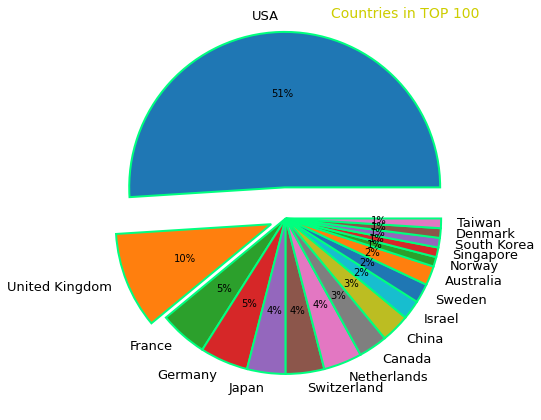

In [30]:
plt.style.use("seaborn-talk")

labels =world_Rank.country 
values = world_Rank.appeared


wedge_dict = {
    'edgecolor': '#00FF7F',
    'linewidth': 2        
}

explode = (0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.title('Countries in TOP 100',size= 14, color='#CDCD00', loc = 'right')
plt.pie(values, labels=labels, explode=explode, autopct='%1.0f%%', wedgeprops=wedge_dict)
plt.show()


In [31]:
dataFrame = dataFr[['name', 'score']]
data1 = dataFrame[:10]
data2 = dataFrame[1990:]
dataFrame = pd.concat([data1,data2])
dataFrame

,name,score
0,Harvard University,100.0
1,Massachusetts Institute of Technology,96.7
2,Stanford University,95.2
3,University of Cambridge,94.1
4,University of Oxford,93.3
5,Columbia University,92.6
6,Princeton University,92.0
7,University of Pennsylvania,91.6
8,University of Chicago,91.1
9,Yale University,90.7


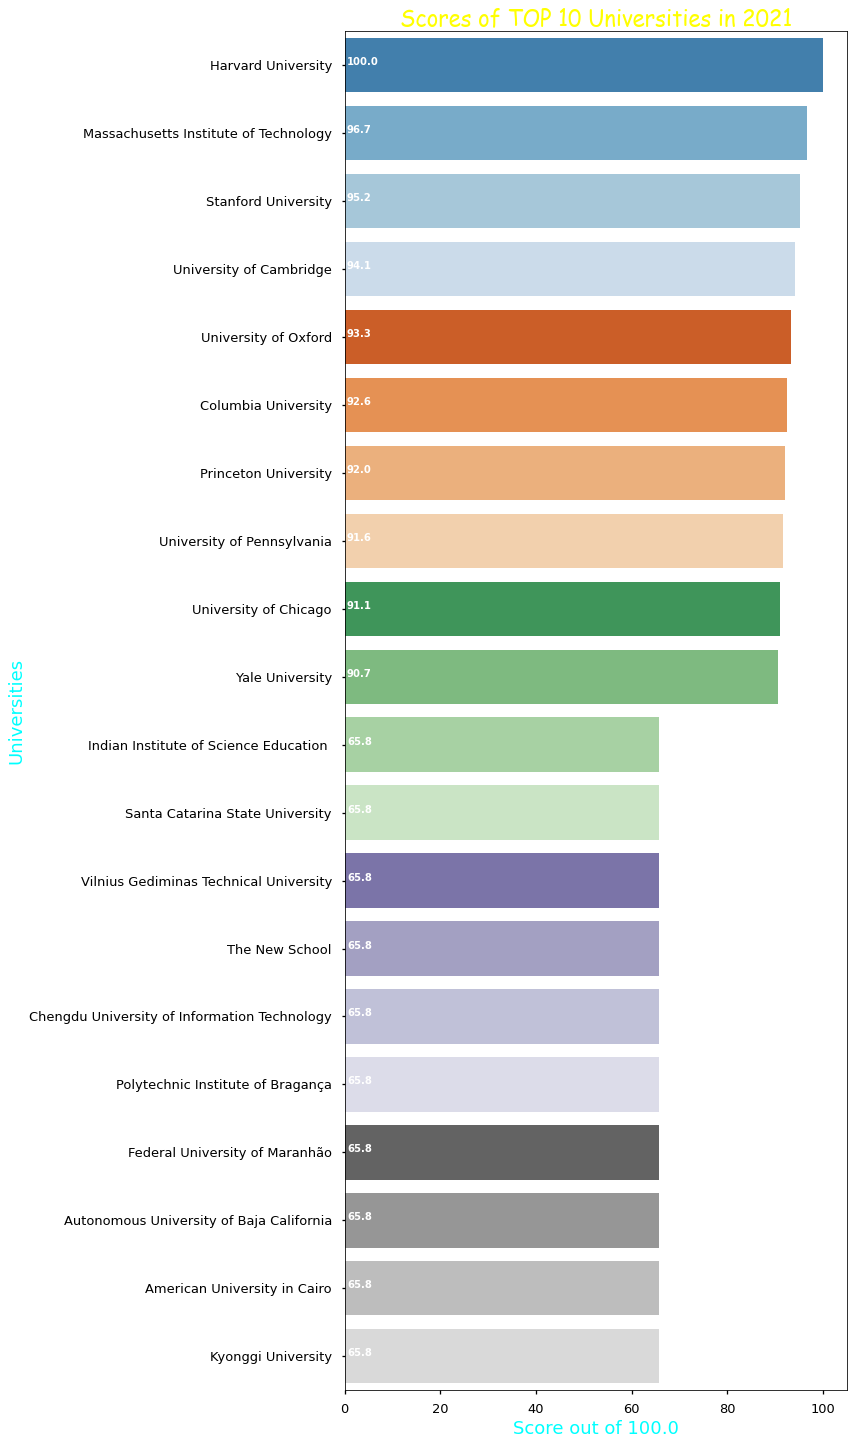

In [32]:
import seaborn as sns

plt.figure(figsize=(9,25))
font1 = {'family':'fantasy','color':'yellow','size':22}
ax = sns.barplot(x="score", y="name",
                 data=dataFrame, palette="tab20c",
                 linewidth = 1)
for i,j in enumerate(dataFrame["score"]):
    ax.text(.5, i, j, weight="bold", color = 'white', fontsize =10)
plt.title("Scores of TOP 10 Universities in 2021", fontdict = font1)
ax.set_xlabel(xlabel = 'Score out of 100.0', color='cyan',fontsize = 18)
ax.set_ylabel(ylabel = 'Universities', color='cyan',fontsize = 18)
plt.show()